## Title
By: Philip Tian, Jonathan Lin, David Ahmed

In [63]:
import pandas as pd
from plotnine import *

data = pd.read_csv("Data/States-historical.csv")

data = data[['state','date','positive','negative','positiveIncrease','negativeIncrease']]
data['date'] = pd.to_datetime(data['date'],format = '%Y%m%d')
cases = data.groupby(['state','date']).agg({'positive': 'sum'}).reset_index().sort_values('state')
#print(data.to_string())

In [85]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
          'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
          'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC']
states_df = list()
for s in states:
    df = data.query('state == @s')
    states_df.append(df)
#print(states_df)

C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\Hefeng Tian\Miniconda3\envs\cmsc320\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


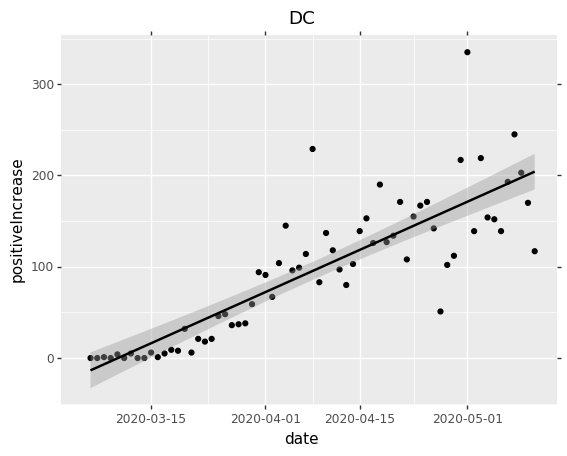

<ggplot: (156126053545)>

In [92]:
(ggplot(states_df[50],aes(y='positiveIncrease',x='date'))
    + geom_point() + geom_smooth(method='lm')
    + ggtitle(states_df[50].iloc[0]['state']))

In [93]:
#TODO: make similar lists/graphs for deaths, for comparing ratio of positve:negative/total, and hospitilizations